In [23]:
import os
import math
import numpy

from shapely.geometry import Polygon
import geopandas
import contextily as cx

## Useful links

https://stackoverflow.com/questions/357415/how-to-read-nasa-hgt-binary-files
https://gis.stackexchange.com/questions/43743/extracting-elevation-from-hgt-file

In [11]:
file = "N52E016.hgt"

siz = os.path.getsize(file)
dim = int(math.sqrt(siz / 2))

assert dim * dim * 2 == siz

In [12]:
data = numpy.fromfile(file, numpy.dtype('>i2'), dim * dim).reshape((dim, dim))

In [13]:
data.shape

(3601, 3601)

In [130]:
mins = (6800125.454397307, 1781111.852692377)
maxes = (6982997.920389787, 1892431.3434856508)
dif = (maxes[0] - mins[0], maxes[1] - mins[1])

In [222]:
shp = data.shape[0]

points = []
values = []

rg = shp

step = 10

for i in range(0, shp, step):
    for j in range(0, shp, step):
        i_add = (i / rg) * dif[1]
        j_add = (j / rg) * dif[0]
        iii_add = ((i + step) / rg) * dif[1]
        jjj_add = ((j + step)/ rg) * dif[0]

        # ii, jj = 16 + i/1000, 52 + j/1000
        ii, jj = mins[1] + i_add, mins[0] + j_add
        iii, jjj = mins[1] + iii_add, mins[0] + jjj_add

        # ii *= 4
        # jj *= 4

        points.append(Polygon([(ii, jj), (iii, jj), (iii, jjj), (ii, jjj)]))
        values.append(data[j, i])

In [223]:
df1 = geopandas.GeoDataFrame({'geometry': points, 'values': values})

In [224]:
df1 = df1.set_crs('epsg:3857')
df1.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [225]:
df_wm = df1.to_crs(epsg=3857)

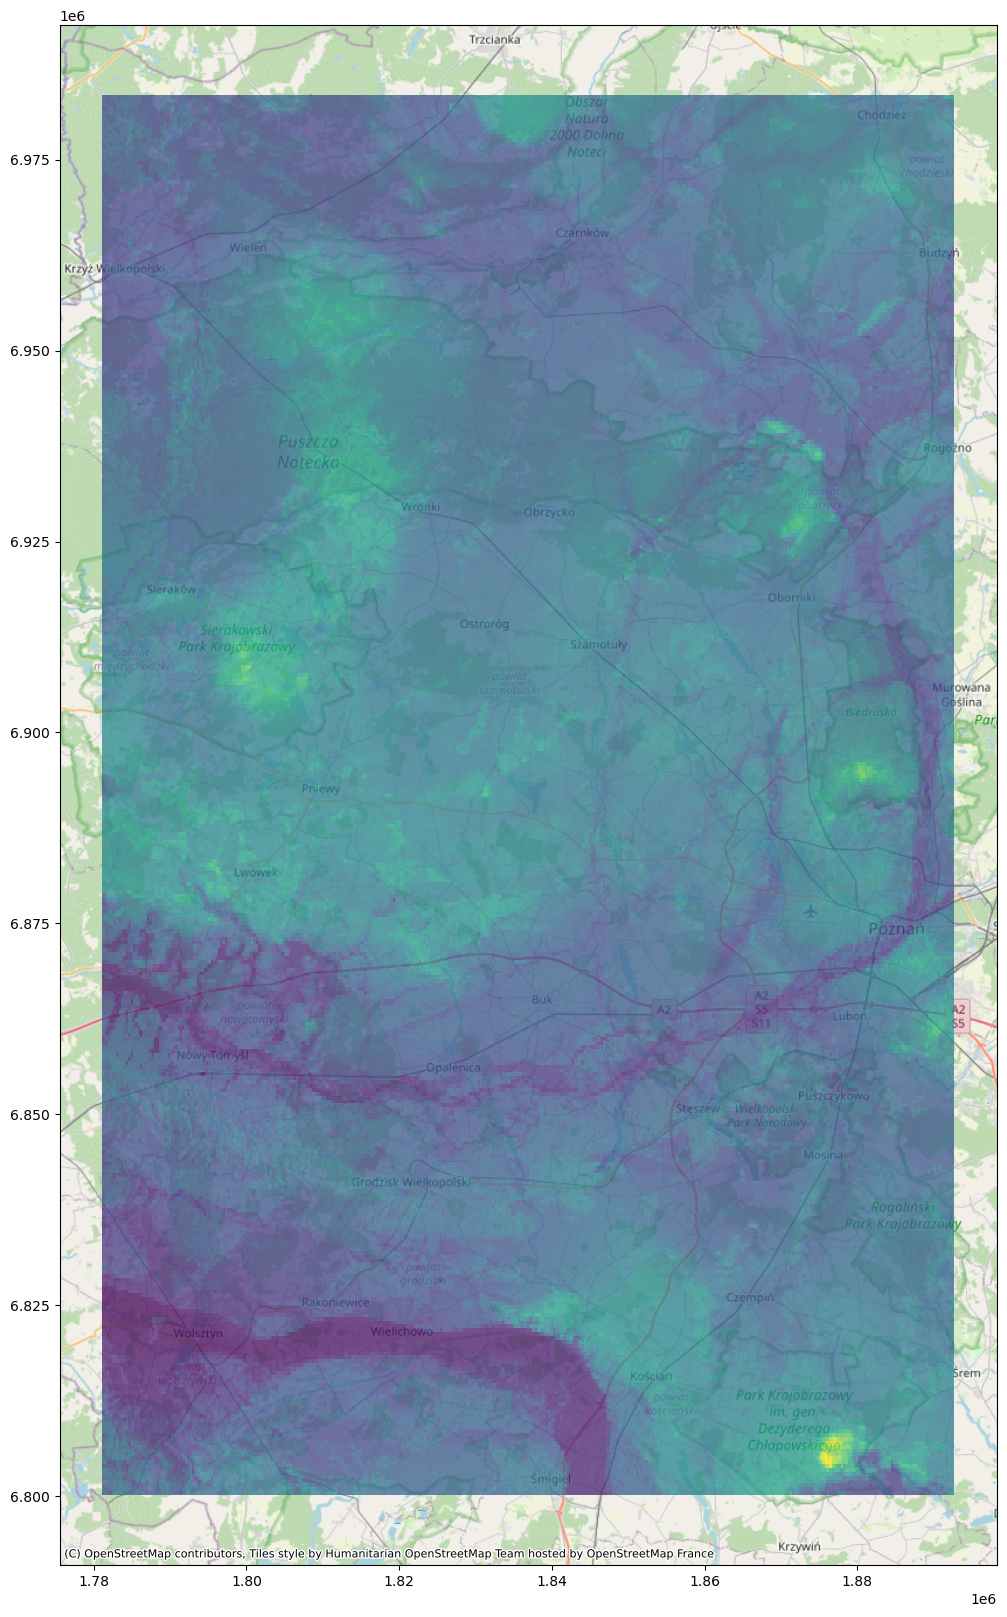

In [226]:
ax = df_wm.plot(column='values', alpha=0.75, figsize=(20, 20))
cx.add_basemap(ax)

<Axes: >

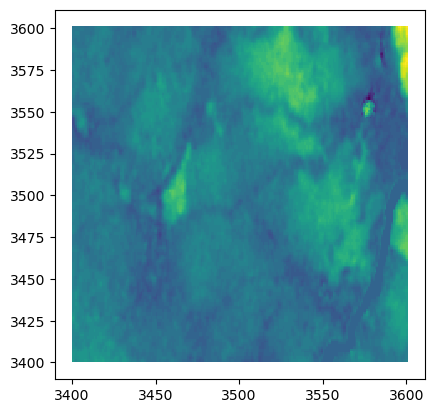

In [7]:
ax = df1.plot(column='values')

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich